# Tic-tac-toe Decision Trees - Machine Learning Project

In the first step, I wrote a program - not very smart - that can play tic-tac-toe with you. Wanting to practice my new skills, here goes two decision tree models which identify when a game is lost or won.

In [1]:
# import pandas library
import pandas as pd

# a list that will determine the dataframe column names
column_names = ['top_left_square',
                'top_middle_square',
                'top_right_square',
                'middle_left_square',
                'middle_middle_square',
                'middle_right_square',
                'bottom_left_square',
                'bottom_middle_square',
                'bottom_right_square',
                'Class']

# reading the csv file
tictac_data = pd.read_csv('./tic-tac-toe.csv', header = None, names = column_names)

# displaying some rows
tictac_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [2]:
# getting the dataframe size
print('tictac_data size:', tictac_data.size)

# verifying te values of each column
for col in tictac_data.columns:
    print(f'values in {col} column: {tictac_data[col].unique()}')

tictac_data size: 9580
values in top_left_square column: ['x' 'o' 'b']
values in top_middle_square column: ['x' 'o' 'b']
values in top_right_square column: ['x' 'o' 'b']
values in middle_left_square column: ['x' 'o' 'b']
values in middle_middle_square column: ['o' 'b' 'x']
values in middle_right_square column: ['o' 'b' 'x']
values in bottom_left_square column: ['x' 'o' 'b']
values in bottom_middle_square column: ['o' 'x' 'b']
values in bottom_right_square column: ['o' 'x' 'b']
values in Class column: ['positive' 'negative']


In [3]:
# atribuiting to square_columns all columns of tictac_data, less the Class column
square_columns = tictac_data.columns.drop('Class')

# label encoding the values of the dataset, that is, replacing string values for int
for col in square_columns:
    tictac_data.loc[tictac_data[col] == 'b', col] = 0
    tictac_data.loc[tictac_data[col] == 'x', col] = 1
    tictac_data.loc[tictac_data[col] == 'o', col] = 2

# the same happens here
tictac_data.loc[tictac_data['Class'] == 'positive', 'Class'] = 1
tictac_data.loc[tictac_data['Class'] == 'negative', 'Class'] = 0

In [14]:
# verifying the label encoding
tictac_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,Class
0,1,1,1,1,2,2,1,2,2,1
1,1,1,1,1,2,2,2,1,2,1
2,1,1,1,1,2,2,2,2,1,1
3,1,1,1,1,2,2,2,0,0,1
4,1,1,1,1,2,2,0,2,0,1


In [13]:
# more import
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# defining our model
model = DecisionTreeRegressor(random_state = 1)

# splitting the data in four
# 'Train' correspond to the data which will be used to train the model and 'val', for the validation
# 'X' is the input, and 'y', the expected output
train_X, val_X, train_y, val_y = train_test_split(tictac_data.drop('Class', axis = 1), tictac_data.Class, random_state = 0)

# fitting the model
model.fit(train_X, train_y)

# getting its predictions
predictions = model.predict(val_X)

# calculating the mean absolute error
mae = mean_absolute_error(val_y, predictions)

# showing it
print(f'Mean absolute error: {mae:.3f}')

Mean absolute error: 0.083


In [5]:
# this never ends!
import eli5
from eli5.sklearn import PermutationImportance

# here I wanted to discover what feature is more important, according to what the model has learned
perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.8626 ± 0.0876,middle_middle_square
0.5509 ± 0.1980,bottom_right_square
0.5002 ± 0.1040,bottom_left_square
0.4603 ± 0.1329,top_right_square
0.4494 ± 0.0423,top_left_square
0.3371 ± 0.1040,bottom_middle_square
0.3298 ± 0.0839,middle_left_square
0.3117 ± 0.1200,middle_right_square
0.2465 ± 0.0814,top_middle_square


What interesting! As when we start playing tic-tac-toe, we realize that the center square is very important
for winning the game, and the model has concluded the same.

In [6]:
# transforming the mae in accuracy percentage
print(f'accuracy: {100*(1 - mae):.0f}%')

accuracy: 92%


In [7]:
# ...
from graphviz import Source
from sklearn import tree

# saving the model structure in a png file, so I can take a look at it
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=square_columns))
graph.format = 'png'
graph.render('tictac_model',view=True)

'tictac_model.png'

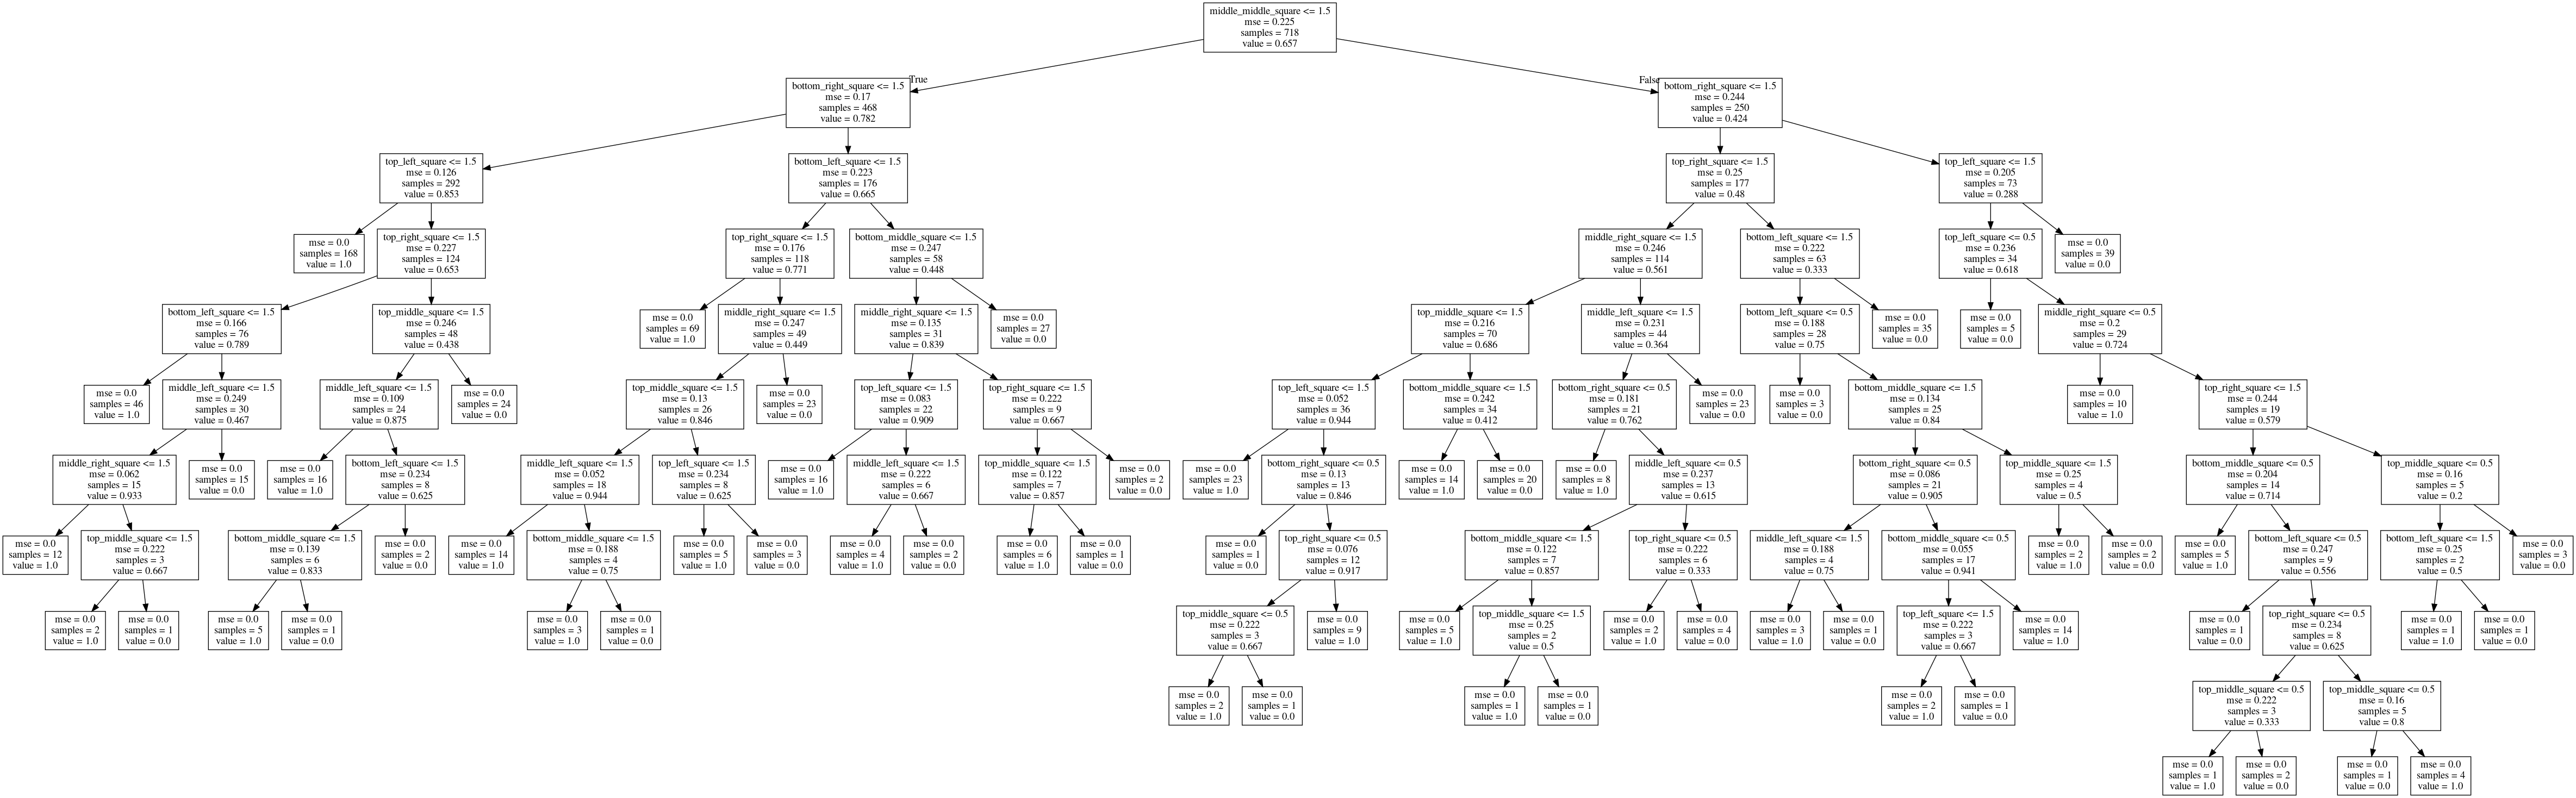

In [25]:
# all right, I give up
from IPython.display import Image

# showing the model
Image(filename = './tictac_model.png')

Bellow, the process was entirely repeated, but this time the model was fitted with all the data.
I know it's not recommended using the same training data for validation, but the dataset has all possible scenarios of the game, and I wanted to check if the model has absorbed them all.

In [8]:
other_model = DecisionTreeRegressor(random_state = 1)
other_model.fit(tictac_data.drop('Class', axis = 1), tictac_data.Class)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [9]:
predictions = other_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)

print('Mean absolute error:', mae)
print(f'accuracy: {100*(1 - mae):.0f}%')

Mean absolute error: 0.0
accuracy: 100%


In [10]:
perm = PermutationImportance(other_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
1.0402 ± 0.1461,middle_middle_square
0.7756 ± 0.1109,bottom_left_square
0.7539 ± 0.1461,top_left_square
0.6560 ± 0.1060,bottom_right_square
0.5980 ± 0.0826,top_right_square
0.5726 ± 0.1309,middle_left_square
0.3733 ± 0.1114,middle_right_square
0.3661 ± 0.1222,bottom_middle_square
0.3334 ± 0.1137,top_middle_square


In [11]:
graph = Source(tree.export_graphviz(other_model, out_file=None, feature_names=square_columns))
graph.format = 'png'
graph.render('tictac_model2',view=True)

'tictac_model2.png'

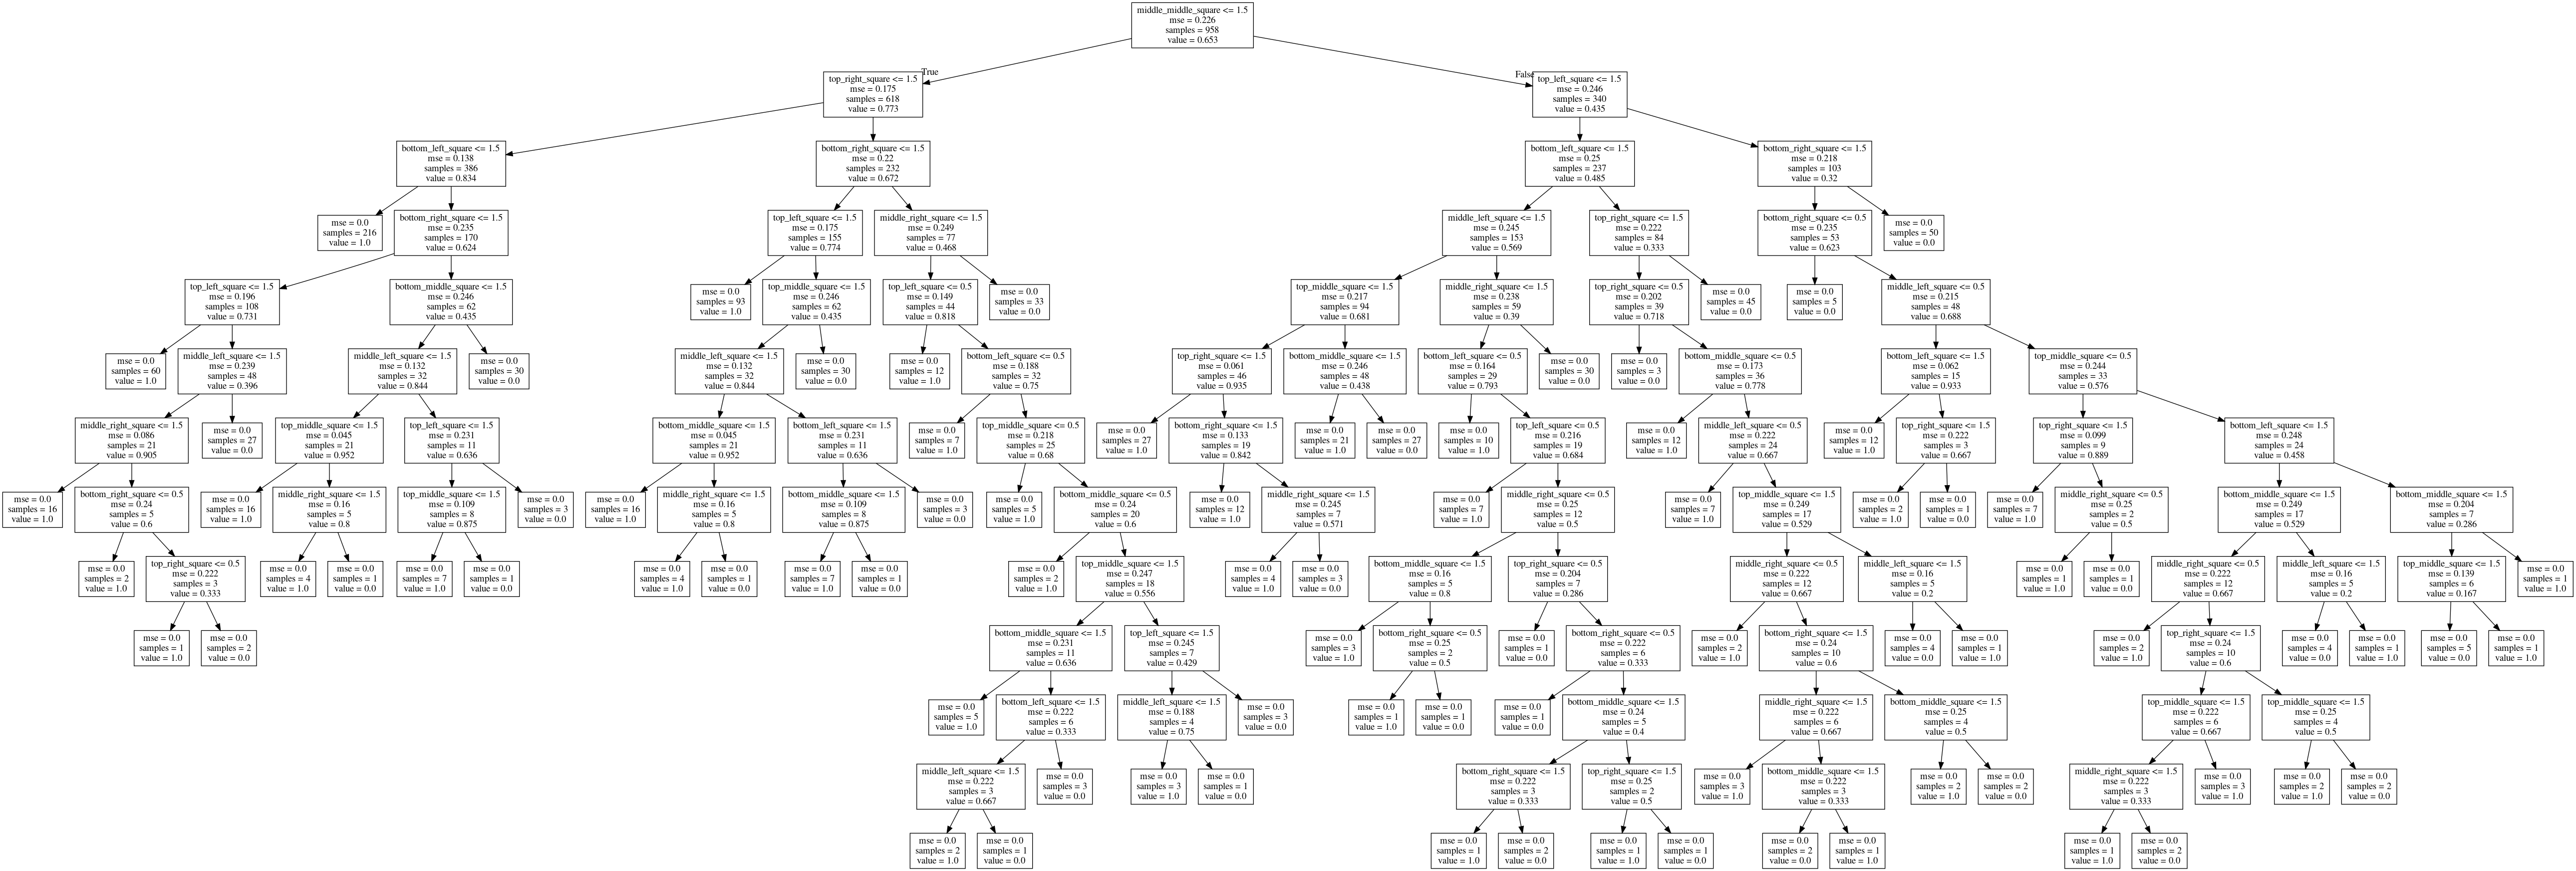

In [26]:
Image(filename = './tictac_model2.png')

As we can see, the error has reached zero and some features have become more important them others, but middle_middle_square is still on the top.

So... that's it! If your interested in obtaining this dataset, here's the citation:

   Aha, D. W.(1991). UCI Machine Learning Repository [[https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame]](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame).